1- Importing Libraries.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

2- Load and Preprocess Dataset.

In [19]:
dataset = pd.read_csv("Housing.csv")
features = dataset.drop(columns=['price'])
target = dataset['price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
numeric_features_train = features_train.select_dtypes(include=[np.number])
numeric_features_test = features_test.select_dtypes(include=[np.number])
features_train_normalized = (numeric_features_train - numeric_features_train.mean()) / numeric_features_train.std()
features_test_normalized = (numeric_features_test - numeric_features_train.mean()) / numeric_features_train.std()

3- Implement the Square Trick.

In [21]:
class SquareTrickLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.price_per_room = 0
        self.base_price = 0

    def fit(self, X, y):
        num_samples, num_features = X.shape
        for _ in range(self.iterations):
            for i in range(num_samples):
                num_rooms = X[i, 0]
                price = y[i]
                self.price_per_room, self.base_price = self.square_trick(
                    self.base_price, self.price_per_room, num_rooms, price, self.learning_rate
                )

    def square_trick(self, base_price, price_per_room, num_rooms, price, learning_rate):
        predicted_price = base_price + price_per_room * num_rooms
        base_price += learning_rate * (price - predicted_price)
        price_per_room += learning_rate * num_rooms * (price - predicted_price)
        return price_per_room, base_price

    def predict(self, X):
        return self.base_price + self.price_per_room * X[:, 0]

4- Train and Evaluate Custom Linear Regression with Square Trick.

In [24]:
model = SquareTrickLinearRegression(learning_rate=0.01, iterations=1000)
model.fit(features_train_normalized.values, target_train.values)
target_predictions_simple = model.predict(features_test_normalized.values)
rmse_simple = np.sqrt(mean_squared_error(target_test, target_predictions_simple))
r2_simple = r2_score(target_test, target_predictions_simple)
print("Square Trick Linear Regression RMSE:", rmse_simple)
print("Square Trick Linear Regression R^2:", r2_simple)

Square Trick Linear Regression RMSE: 1876369.9768513243
Square Trick Linear Regression R^2: 0.30344933032344945


5- Experiment with Polynomial Features.

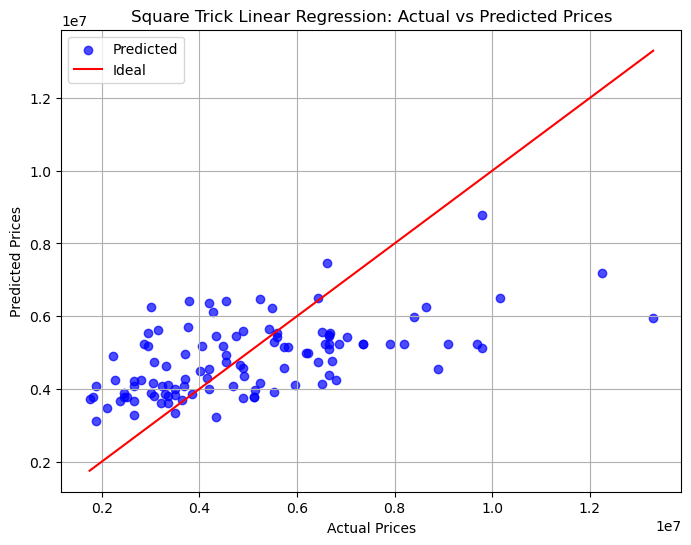

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(target_test, target_predictions_simple, color='blue', label='Predicted', alpha=0.7)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', label='Ideal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Square Trick Linear Regression: Actual vs Predicted Prices")
plt.legend()
plt.grid()
plt.show()